# Decision Trees

Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multioutput tasks. They are powerful algorithms, capable of fitting complex datasets.

### Characteristics

- AKA **CART** (Classification and Regression Trees)
- The CART algorithm produces only *binary* (max 2 child nodes per parent) trees
- A **classification tree** is used to predict *categorical* outcomes
- A **regression tree** is used to predict *continuous* outcomes


Scikit-Learn uses the **CART** algorithm to train Decision Trees. The algorithm works by splitting the training set into two subsets using a single feature $k$ and a threshold $t_k$. The algorithm searches for the pair $(k, t_k)$ that produces the "purest" subsets (weighted by their size).

Once the CART algorithm has successfully split the training set in two, it splits the subsets using the same logic, then the sub-subsets, and so on, stopping once it reaches the maximum depth (defined by the `max_depth` parameter), or if it cannot find a split that will *reduce* impurity.

This part handled by `sklearn.tree.DecisionTreeRegressor`, so it isn't necessary to understand the theory behind it. However, I was interested and that's why I've included it here.

#### Visual representation of a dataset and its Decision Tree split

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#### Example of a Decision Tree

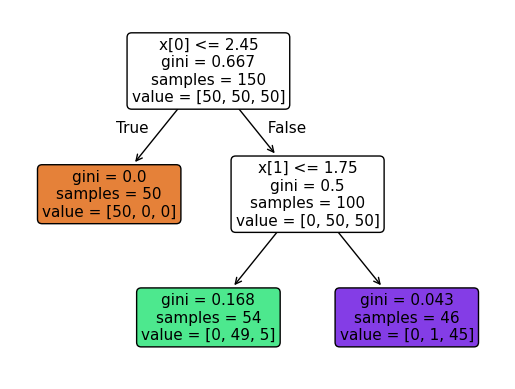

In [8]:
# adapted from https://github.com/ageron/handson-ml3/blob/main/06_decision_trees.ipynb

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)
plot_tree(tree_clf, filled=True, rounded=True, fontsize=11)
plt.show()

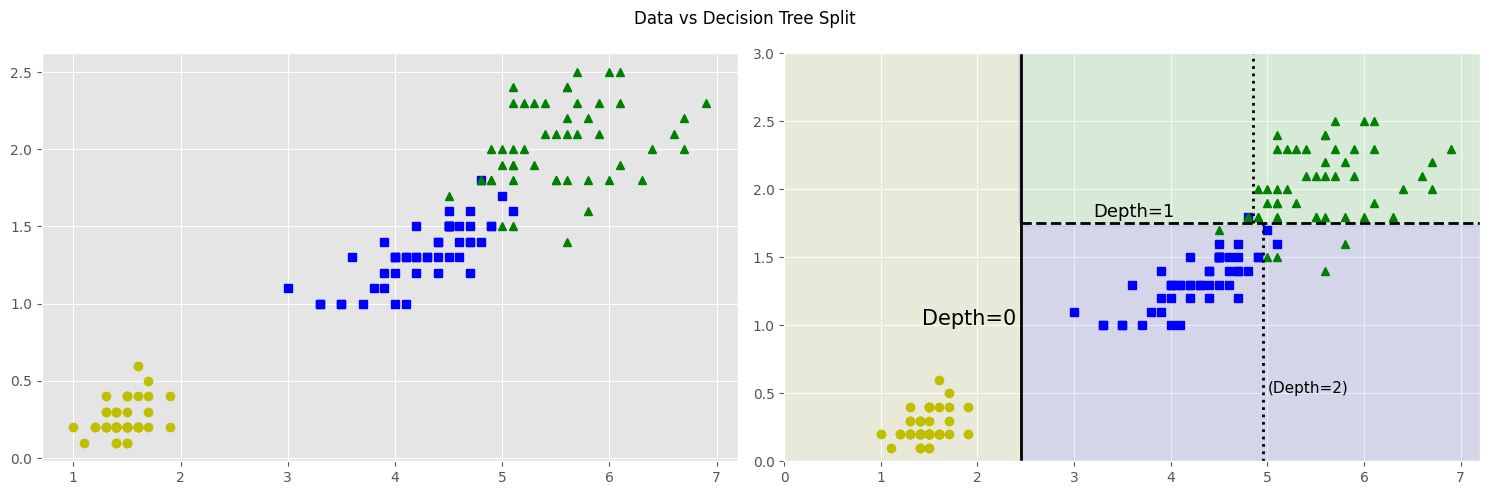

In [9]:
# adapted from https://github.com/ageron/handson-ml3/blob/main/06_decision_trees.ipynb

custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.style.use('ggplot')
plt.figure(figsize=(15, 5))
plt.suptitle("Data vs Decision Tree Split")


lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)

def style_loop():
    for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
        plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

plt.subplot(121)
style_loop()

plt.subplot(122)

tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X_iris, y_iris)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]

style_loop()
    
plt.contourf(
    lengths, 
    widths, 
    y_pred, 
    alpha=0.2, 
    cmap=custom_cmap
)

plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])

plt.tight_layout()
plt.show()

#### Gini Impurity

A node is "pure" ($gini = 0$) if *all* training instances it applies to belong to the same class.

Gini impurity is the probability of incorrectly classifying a randomly chosen element in the dataset if it were randomly labeled according to the class distribution in the dataset.

Where:
- $G_i$ is the Gini impurity of the $i^{th}$ node
- $p_{i, k}$ is the ratio of class $k$ instances among the training instances in the $i^{th}$ node
- $n$ is the number of classes 

$$G_i = 1 - \sum_{k=1}^{n} p_{i, k}^2$$

#### Cost function for the CART training algorithm



Where
- $G$ is the impurity of the node
- $m$ is the number of instances in the node
- $m_{left}$ and $m_{right}$ are the number of instances in the left and right child nodes

$$J(k, t_k) = \frac{m_{left}}{m} G{left} + \frac{m_{right}}{m} G{right}$$

#### Entropy

By default, the `criterion` hyperparameter is set to `gini` in Scikit-Learn's DecisionTreeClassifier.

Entropy can be used as an alternative. Should it? Well, it depends on: entropy will tend to produce slightly more balanced trees, but gini impurity is faster to compute.

Anyway here's the formula for entropy.

Where:

Assuming $p_{i, k} \neq 0$

- $H_i$ is the entropy of the $i^{th}$ node
- $p_{i,k}\log_2(p_{i,k})$ is the contribution of a class $k$ to the entropy
- $- \sum_{k=1}^{n}$ the sum of the contributions of all possible classes

$$H_i = - \sum_{k=1}^{n} p_{i, k} \log_2(p_{i, k})$$





## Decision Tree Regression

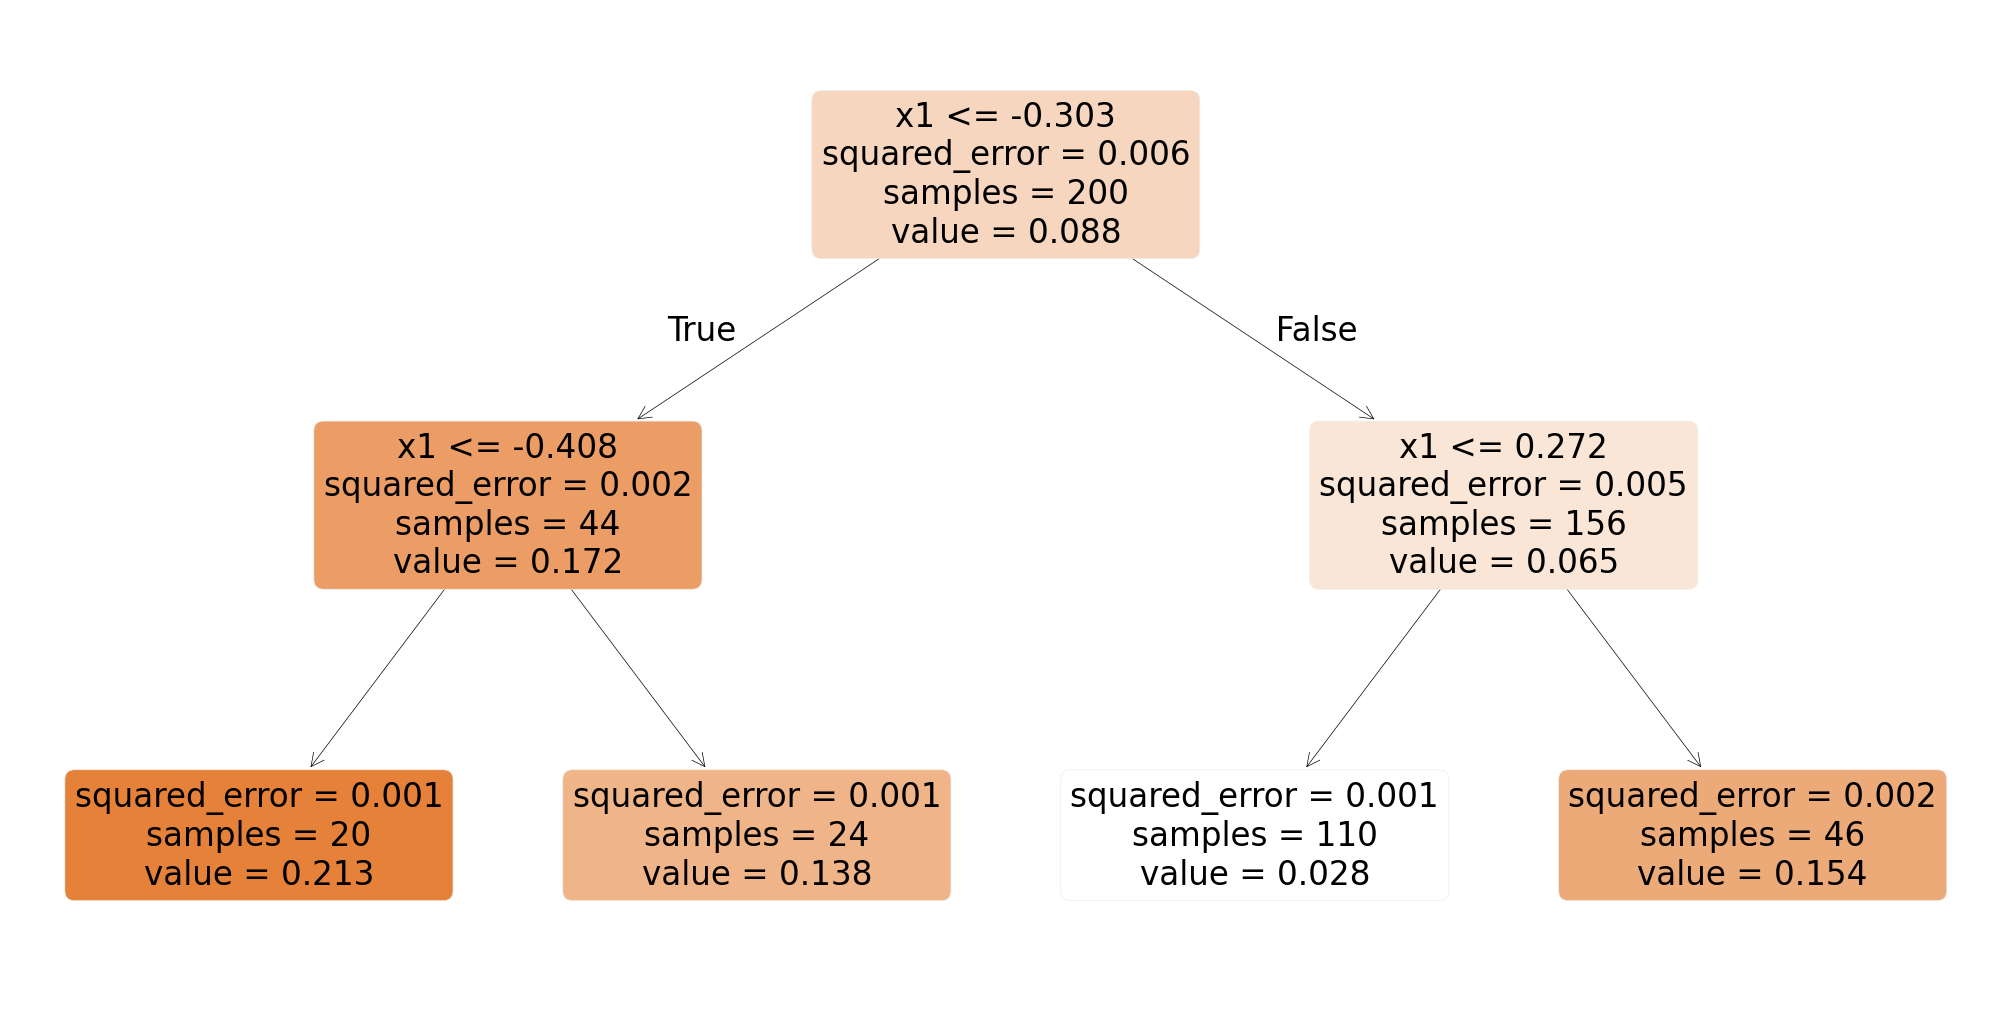

In [10]:
# https://github.com/ageron/handson-ml3/blob/main/06_decision_trees.ipynb
np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5  # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

# export_graphviz(
#     tree_reg,
#     out_file=str("./img/regression_tree.dot"),
#     feature_names=["x1"],
#     rounded=True,
#     filled=True
# )
# Source.from_file("./img/regression_tree.dot")
plt.figure(figsize=(20, 10), layout="compressed")
plot_tree(tree_reg, filled=True, rounded=True, feature_names=["x1"])
plt.show()

In [11]:
import pandas as pd

In [12]:
dataset = pd.read_csv("data/Position_Salaries.csv")
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [13]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [14]:
regressor.predict([[6.5]])

array([150000.])

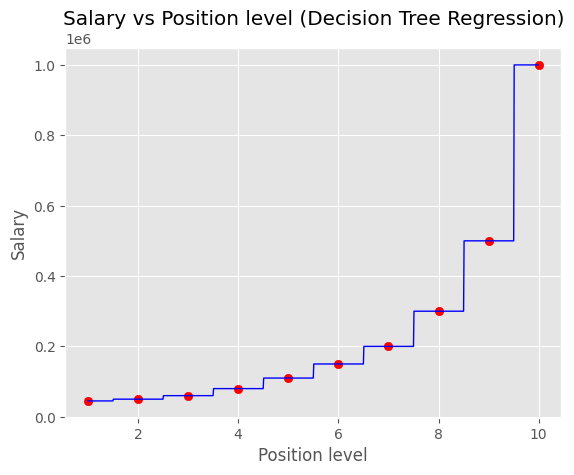

In [15]:
X_grid = np.arange(min(X)[0], max(X)[0], 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue', linewidth = 1)
plt.title('Salary vs Position level (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Visualizing this decision tree has been a bit of a headache.

First, using `plot_tree` from `sklearn.tree` I had to adjust the `dpi` to 150 to make the text readable.

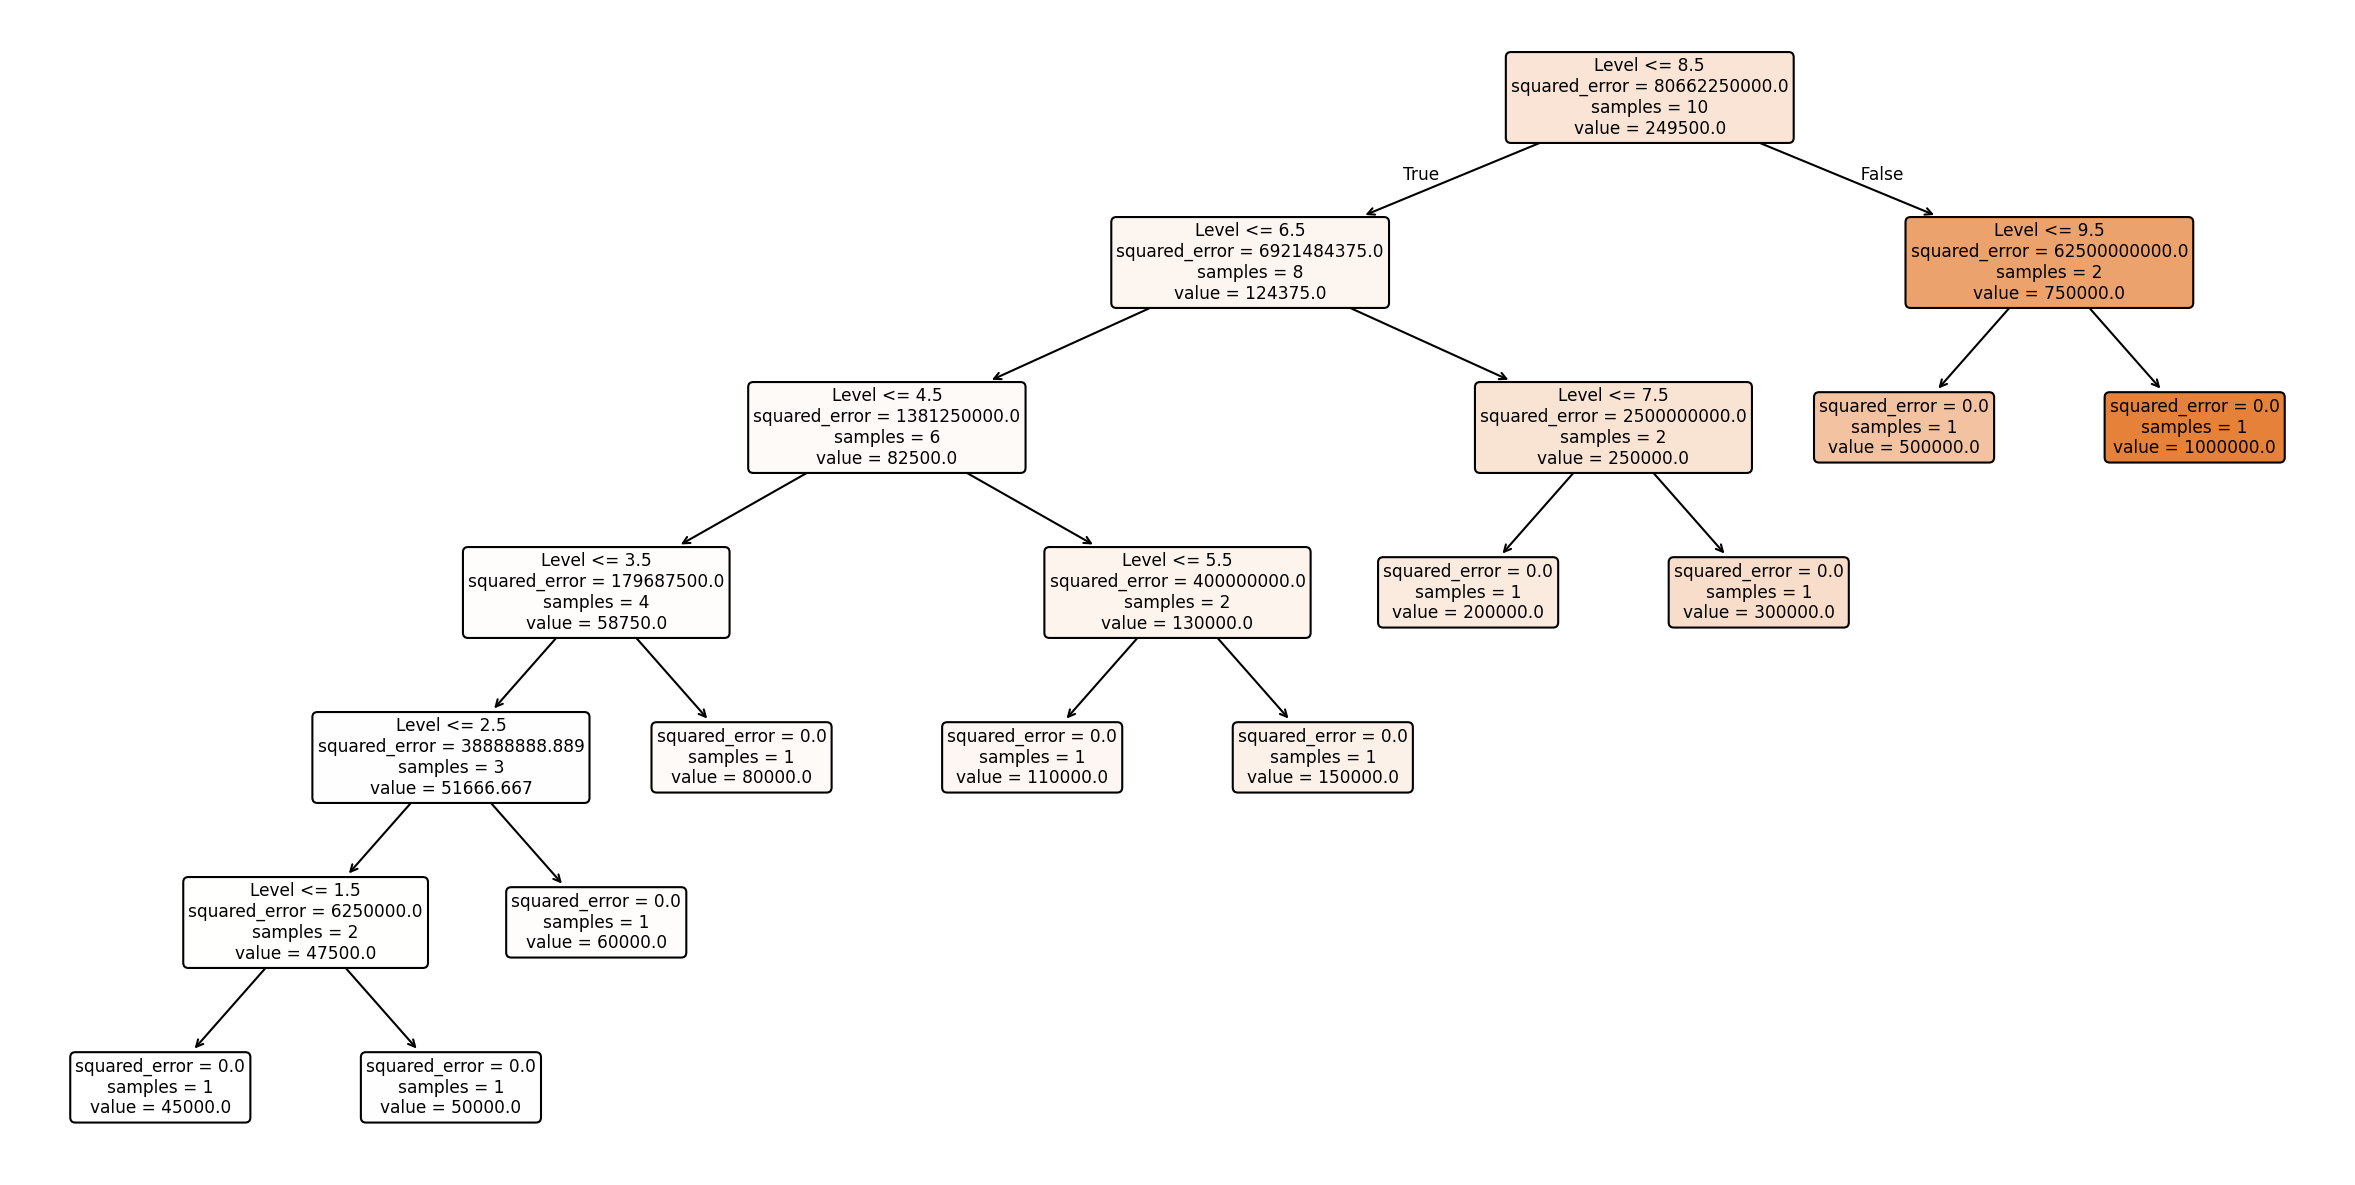

In [63]:
plt.figure(figsize=(20, 10), dpi=150)
plot_tree(regressor, filled=True, rounded=True, feature_names=["Level"])
plt.show()

`graphviz` does a better job at visualizing the tree with default parameters, but it looks like it was made in the 80s (nothing wrong with being made in the 80s, I was born in '82):

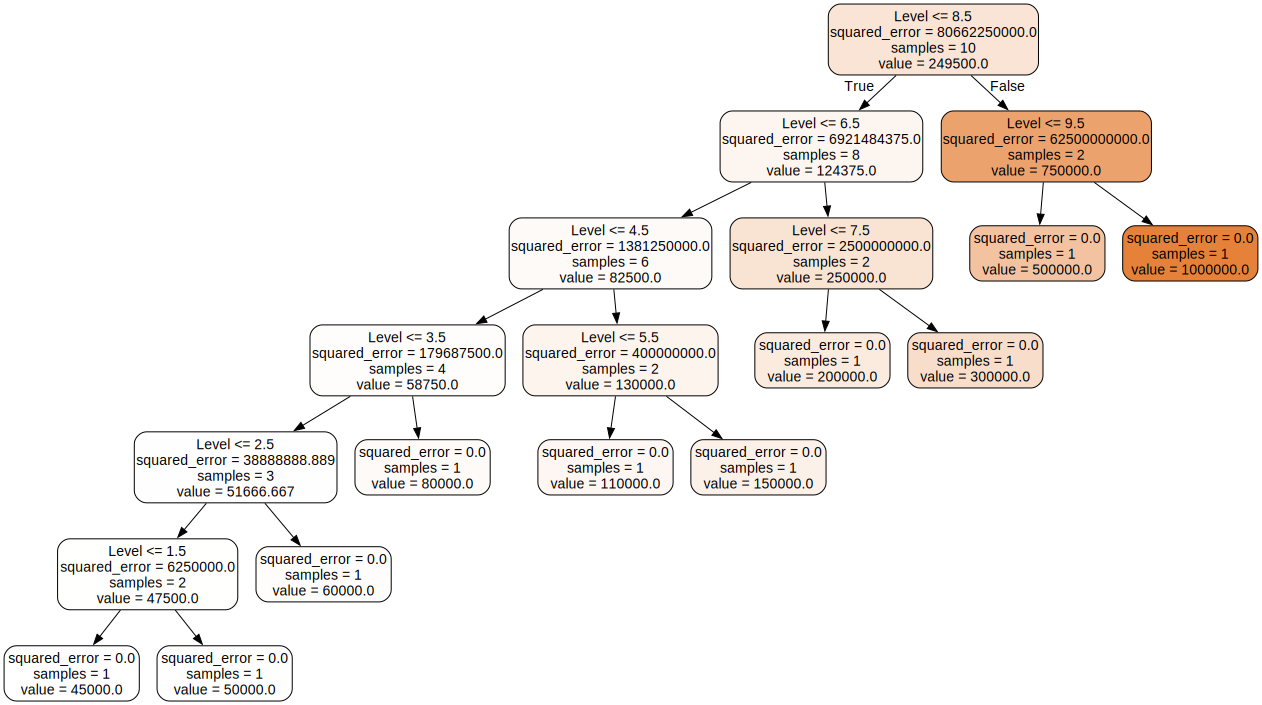

In [64]:
from sklearn.tree import export_graphviz
from graphviz import Source

export_graphviz(
    regressor,
    out_file=str("./img/regression_tree.dot"),
    feature_names=["Level"],
    rounded=True,
    filled=True
)

Source.from_file("./img/regression_tree.dot")